In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.externals import joblib

## Load data

In [3]:
df = pd.read_csv('train_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39983 entries, 0 to 39982
Columns: 141 entries, x0 to x68_nan
dtypes: float64(95), int64(46)
memory usage: 43.0 MB


In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x68_nan
0,-17.933519,6.559220,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,...,0,0,0,0,0,0,0,0,1,0
1,-37.214754,10.774930,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,...,0,0,1,0,0,0,0,0,0,0
2,0.330441,-19.609972,-1.331804,-15.153892,19.710240,19.077300,-1.747110,0.545570,-1.464609,3.670570,...,0,0,1,0,0,0,0,0,0,0
3,-13.709765,-8.011390,-1.536483,23.129497,27.880879,20.573991,-1.617689,4.129694,1.139928,2.912838,...,0,0,0,0,0,0,0,0,0,0
4,-4.202598,7.076210,8.881550,23.600777,26.232164,-14.462320,3.231193,-0.069364,-7.310536,-2.268700,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sort_index(axis=1,inplace=True)

In [6]:
df.head()

,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,...,x93_asia,x93_euorpe,x93_nan,x94,x95,x96,x97,x98,x99,y
0,-17.933519,6.559220,-6.930959,1.216195,-3.201791,-2.554698,18.641967,4.355568,2.930575,-8.837017,...,1,0,0,0.421524,35.259947,8.994318,-21.000182,-0.686588,2.949106,1
1,-37.214754,10.774930,55.127380,0.226435,0.080309,-6.158352,-0.068433,0.671255,1.047602,11.512884,...,1,0,0,-0.132764,-1.192563,3.885024,-37.886523,-7.730392,-1.107330,0
2,0.330441,-19.609972,-23.198723,-1.728167,0.194729,15.425624,-7.377787,-5.148825,7.518404,-4.618872,...,1,0,0,1.432308,-3.435427,-1.133450,7.426099,-5.945534,1.316312,0
3,-13.709765,-8.011390,-4.266473,-0.611641,-2.266844,-4.727266,1.947570,-7.887527,10.183794,-5.534296,...,1,0,0,0.733069,4.372964,15.529931,29.712153,2.240740,0.477195,0
4,-4.202598,7.076210,1.134867,1.074985,-0.937646,-2.092563,-3.835046,4.566927,2.011431,-1.002053,...,1,0,0,-0.977502,-30.085932,-8.244312,66.540331,-3.478195,-2.869702,1


In [7]:
df.columns

Index(['x0', 'x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       ...
       'x93_asia', 'x93_euorpe', 'x93_nan', 'x94', 'x95', 'x96', 'x97', 'x98',
       'x99', 'y'],
      dtype='object', length=141)

In [8]:
y = df.y
y.head()

0    1
1    0
2    0
3    0
4    1
Name: y, dtype: int64

In [9]:
x = df.drop('y',1)
x.head()

,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,...,x93_america,x93_asia,x93_euorpe,x93_nan,x94,x95,x96,x97,x98,x99
0,-17.933519,6.559220,-6.930959,1.216195,-3.201791,-2.554698,18.641967,4.355568,2.930575,-8.837017,...,0,1,0,0,0.421524,35.259947,8.994318,-21.000182,-0.686588,2.949106
1,-37.214754,10.774930,55.127380,0.226435,0.080309,-6.158352,-0.068433,0.671255,1.047602,11.512884,...,0,1,0,0,-0.132764,-1.192563,3.885024,-37.886523,-7.730392,-1.107330
2,0.330441,-19.609972,-23.198723,-1.728167,0.194729,15.425624,-7.377787,-5.148825,7.518404,-4.618872,...,0,1,0,0,1.432308,-3.435427,-1.133450,7.426099,-5.945534,1.316312
3,-13.709765,-8.011390,-4.266473,-0.611641,-2.266844,-4.727266,1.947570,-7.887527,10.183794,-5.534296,...,0,1,0,0,0.733069,4.372964,15.529931,29.712153,2.240740,0.477195
4,-4.202598,7.076210,1.134867,1.074985,-0.937646,-2.092563,-3.835046,4.566927,2.011431,-1.002053,...,0,1,0,0,-0.977502,-30.085932,-8.244312,66.540331,-3.478195,-2.869702


## Split data

In [10]:
# split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27988, 140) (27988,)
(11995, 140) (11995,)


# Part 1: Build model

## 1.1. Logistic Regression

In [11]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# accuracy
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

88.9

In [13]:
# prediction
ypred_logreg = logreg.predict(X_test)

In [14]:
# f1_score
f1_score(Y_test,ypred_logreg,average='macro')

0.8098362586607939

In [15]:
# confusion matrix
confusion_matrix(Y_test,ypred_logreg,labels=[0,1])

array([[9200,  398],
       [ 934, 1463]], dtype=int64)

In [16]:
# Area Under the Receiver Operating Characteristic Curve
roc_auc_score(Y_test, ypred_logreg)

0.784439646940074

In [17]:
print(classification_report(Y_test, ypred_logreg))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      9598
           1       0.79      0.61      0.69      2397

   micro avg       0.89      0.89      0.89     11995
   macro avg       0.85      0.78      0.81     11995
weighted avg       0.88      0.89      0.88     11995



In [18]:
# save model
joblib.dump(logreg, 'Logistic_model.pkl')

['Logistic_model.pkl']

## 1.2. XGBoost model

In [19]:
m_xgb = XGBClassifier()
m_xgb.fit(X_train, Y_train)

acc_xgb = round(m_xgb.score(X_test, Y_test) * 100, 2)
acc_xgb

90.2

In [20]:
ypred_xgb = m_xgb.predict(X_test)

In [21]:
f1_score(Y_test,ypred_xgb,average='macro')

0.8180405970885334

In [22]:
confusion_matrix(Y_test,ypred_xgb,labels=[0,1])

array([[9485,  113],
       [1062, 1335]], dtype=int64)

In [23]:
# Area Under the Receiver Operating Characteristic Curve
roc_auc_score(Y_test, ypred_xgb)

0.7725864483135697

In [24]:
print(classification_report(Y_test, ypred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9598
           1       0.92      0.56      0.69      2397

   micro avg       0.90      0.90      0.90     11995
   macro avg       0.91      0.77      0.82     11995
weighted avg       0.90      0.90      0.89     11995



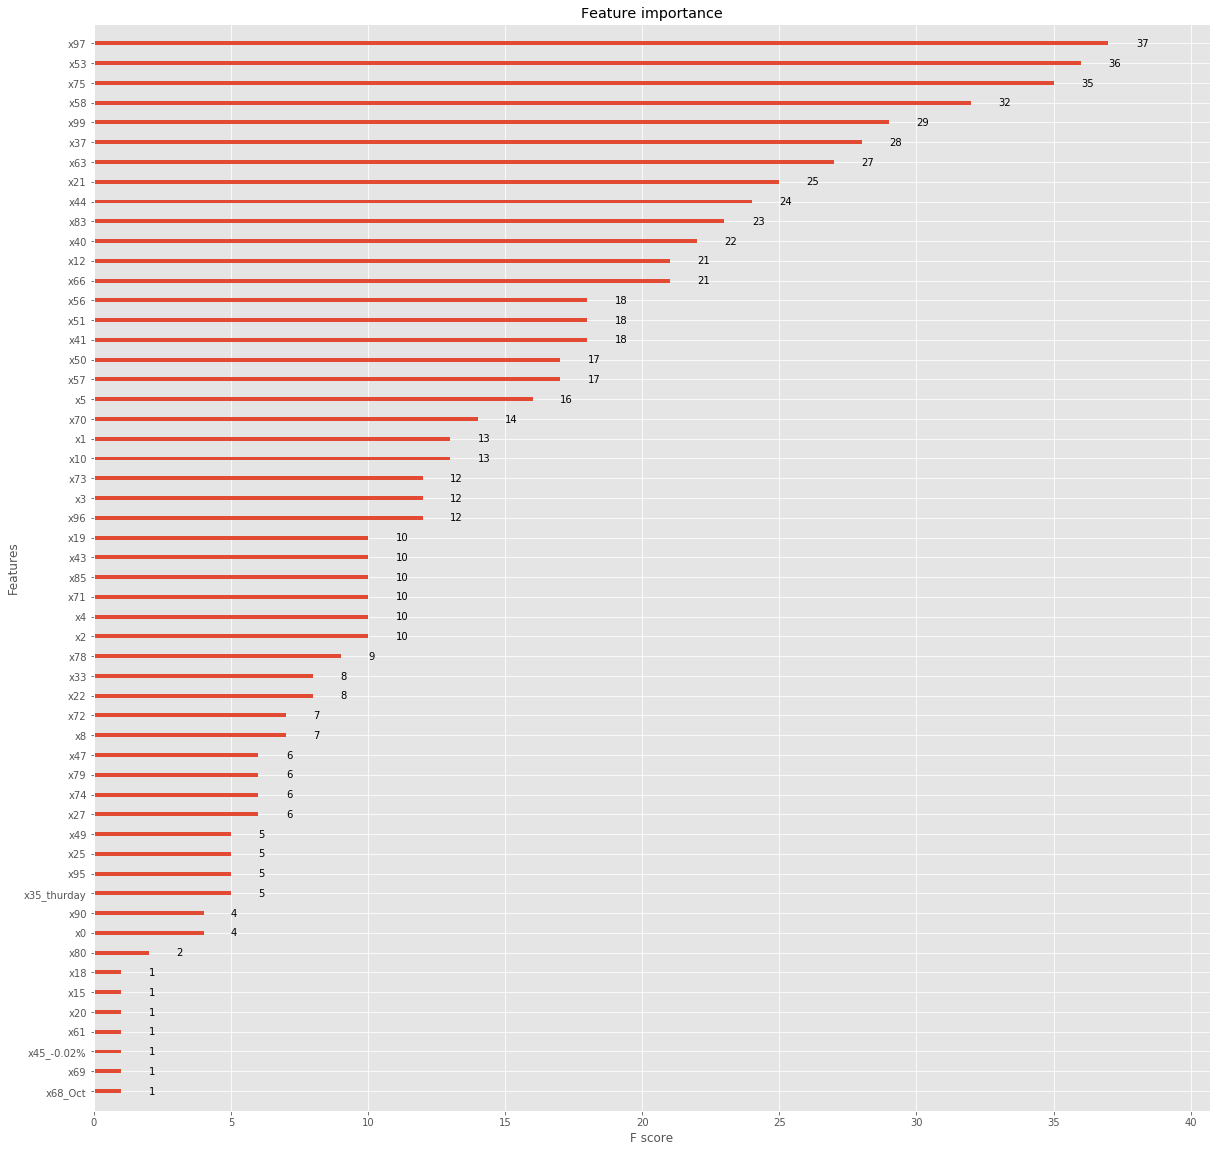

In [25]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
plot_importance(m_xgb,ax=ax)

In [26]:
# save model
joblib.dump(m_xgb, 'xgboost.pkl')

['xgboost.pkl']

# Part 2 : Prediction

In [27]:
# load test_set
test = pd.read_csv('test_set.csv')

In [28]:
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x68_nan,x93_america,x93_asia,x93_euorpe,x93_nan
0,0.196063,3.683995,-3.265963,7.982156,-2.638979,-0.798760,-3.345929,1.266333,-9.689859,1.512794,...,0,0,0,0,0,0,0,1,0,0
1,23.155197,-9.226725,6.179996,-29.612592,-11.146301,-11.858857,-3.588747,-0.928037,-9.924414,0.932668,...,0,0,0,0,0,0,0,1,0,0
2,-13.969618,-0.343978,1.920740,-1.983859,-18.619658,-4.929527,-0.669704,1.906140,-17.125858,1.112156,...,0,0,0,0,0,0,0,1,0,0
3,49.722481,-1.500789,-1.564326,-8.113622,9.696716,-21.883567,-0.737723,4.043544,-11.514792,-1.797036,...,0,0,0,0,0,0,0,1,0,0
4,-13.494403,7.445215,-1.721518,49.111766,-14.566832,-8.327643,-1.031431,0.033500,20.977351,6.744525,...,0,1,0,0,0,0,0,1,0,0


In [29]:
test.sort_index(axis=1,inplace=True)

In [30]:
test.head()

,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,...,x93_america,x93_asia,x93_euorpe,x93_nan,x94,x95,x96,x97,x98,x99
0,0.196063,3.683995,10.782491,-2.150111,-3.440034,-1.457826,-4.622802,12.122639,8.332386,1.826703,...,0,1,0,0,0.023357,6.021137,-2.423546,-1.182148,1.514047,3.775888
1,23.155197,-9.226725,10.703057,-1.256140,-0.836081,18.783275,2.234836,-1.701478,-5.912640,3.575587,...,0,1,0,0,1.349389,19.646176,13.871395,38.657216,5.395564,3.139697
2,-13.969618,-0.343978,22.950872,-1.279778,0.502783,10.260698,-9.837024,-3.173681,-5.908193,-3.899170,...,0,1,0,0,2.149993,22.719042,-2.958959,-36.135939,5.520687,3.733732
3,49.722481,-1.500789,0.046501,1.145335,-0.656622,3.561443,7.979791,-12.359490,-3.681145,4.916650,...,0,1,0,0,-3.052037,-19.306807,-1.275701,-39.607665,1.185943,-2.072836
4,-13.494403,7.445215,-25.478328,0.202861,1.310598,10.898865,-0.230300,-9.400081,-2.130493,-6.563081,...,0,1,0,0,-0.100660,6.732681,4.303092,-42.697656,7.144178,2.820698


In [31]:
test.columns

Index(['x0', 'x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       ...
       'x93_america', 'x93_asia', 'x93_euorpe', 'x93_nan', 'x94', 'x95', 'x96',
       'x97', 'x98', 'x99'],
      dtype='object', length=140)

## 2.1. Logistic Regression

In [32]:
# load model
model1 = joblib.load('Logistic_model.pkl')

In [33]:
model1.predict_proba(test)

array([[0.88927582, 0.11072418],
       [0.9852471 , 0.0147529 ],
       [0.90249682, 0.09750318],
       ...,
       [0.99582686, 0.00417314],
       [0.54311619, 0.45688381],
       [0.32389014, 0.67610986]])

In [34]:
res1 = pd.DataFrame(data=logreg.predict_proba(test),columns=[0,1])
res1.head()

,0,1
0,0.889276,0.110724
1,0.985247,0.014753
2,0.902497,0.097503
3,0.802715,0.197285
4,0.367211,0.632789


In [35]:
result1 = res1.drop(labels=0,axis=1)
result1.head()

,1
0,0.110724
1,0.014753
2,0.097503
3,0.197285
4,0.632789


In [36]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
1    10000 non-null float64
dtypes: float64(1)
memory usage: 78.2 KB


In [37]:
result1.to_csv('results1.csv',index=False)

## 2.2. XGBoost model

In [38]:
# load model
model2 = joblib.load('xgboost.pkl')

In [39]:
model2.predict_proba(test)

array([[0.935678  , 0.06432196],
       [0.9193914 , 0.08060858],
       [0.7935758 , 0.20642418],
       ...,
       [0.9312392 , 0.06876083],
       [0.74644864, 0.2535514 ],
       [0.7794591 , 0.22054091]], dtype=float32)

In [40]:
df.columns

Index(['x0', 'x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       ...
       'x93_asia', 'x93_euorpe', 'x93_nan', 'x94', 'x95', 'x96', 'x97', 'x98',
       'x99', 'y'],
      dtype='object', length=141)

In [41]:
test.columns

Index(['x0', 'x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       ...
       'x93_america', 'x93_asia', 'x93_euorpe', 'x93_nan', 'x94', 'x95', 'x96',
       'x97', 'x98', 'x99'],
      dtype='object', length=140)

In [42]:
res2 = pd.DataFrame(data=model2.predict_proba(test),columns=[0,1])
res2.head()

,0,1
0,0.935678,0.064322
1,0.919391,0.080609
2,0.793576,0.206424
3,0.884945,0.115055
4,0.292587,0.707413


In [43]:
result2 = res2.drop(labels=0,axis=1)
result2.head()

,1
0,0.064322
1,0.080609
2,0.206424
3,0.115055
4,0.707413


In [44]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
1    10000 non-null float32
dtypes: float32(1)
memory usage: 39.1 KB


In [45]:
result2.to_csv('results2.csv',index=False)